In [100]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import optimizers
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import TensorBoard

In [101]:
actions = np.array(['вкручивание_лампочки',
 'использование_баллончика',
 'использование_розетки',
 'использование_тачки',
 'работа_гаечным_ключом',
 'работа_лопатой',
 'работа_молотком',
 'работа_напильником',
 'ремонт_инструмента',
 'сматывание_провода'])

In [102]:
label_map = {label:num for num, label in enumerate(actions)}
actions = np.array(actions)
label_map

{'вкручивание_лампочки': 0,
 'использование_баллончика': 1,
 'использование_розетки': 2,
 'использование_тачки': 3,
 'работа_гаечным_ключом': 4,
 'работа_лопатой': 5,
 'работа_молотком': 6,
 'работа_напильником': 7,
 'ремонт_инструмента': 8,
 'сматывание_провода': 9}

In [103]:
sequence_length = 120
no_sequences = [1,2]
sequences, labels = [], []
for action in actions:
    for sequence in no_sequences:
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join( action, str(sequence), "np{}.npy".format(frame_num)))
            window.append(res)
        print(action, str(sequence), label_map[action])
        sequences.append(window)
        labels.append(label_map[action])

вкручивание_лампочки 1 0
вкручивание_лампочки 2 0
использование_баллончика 1 1
использование_баллончика 2 1
использование_розетки 1 2
использование_розетки 2 2
использование_тачки 1 3
использование_тачки 2 3
работа_гаечным_ключом 1 4
работа_гаечным_ключом 2 4
работа_лопатой 1 5
работа_лопатой 2 5
работа_молотком 1 6
работа_молотком 2 6
работа_напильником 1 7
работа_напильником 2 7
ремонт_инструмента 1 8
ремонт_инструмента 2 8
сматывание_провода 1 9
сматывание_провода 2 9


In [104]:
np.array(sequences).shape

(20, 120, 258)

In [105]:
np.array(labels).shape

(20,)

In [106]:
y = to_categorical(labels).astype(int)

In [107]:
X = np.array(sequences)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
y_train.shape

(16, 10)

Обучение

In [12]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(120,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [22]:
actions.shape[0]

10

In [13]:
opt = optimizers.Adam(learning_rate=0.0001)

In [14]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [15]:
EPOCHS = 2000
history = model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/2000
1/1 [==============================] - 10s 10s/step - loss: 2.3133 - categorical_accuracy: 0.1579
Epoch 2/2000
1/1 [==============================] - 0s 399ms/step - loss: 2.3090 - categorical_accuracy: 0.1579
Epoch 3/2000
1/1 [==============================] - 0s 379ms/step - loss: 2.3054 - categorical_accuracy: 0.2105
Epoch 4/2000
1/1 [==============================] - 0s 401ms/step - loss: 2.3024 - categorical_accuracy: 0.2105
Epoch 5/2000
1/1 [==============================] - 0s 308ms/step - loss: 2.2995 - categorical_accuracy: 0.2105
Epoch 6/2000
1/1 [==============================] - 0s 350ms/step - loss: 2.2967 - categorical_accuracy: 0.2105
Epoch 7/2000
1/1 [==============================] - 0s 311ms/step - loss: 2.2941 - categorical_accuracy: 0.2105
Epoch 8/2000
1/1 [==============================] - 0s 324ms/step - loss: 2.2915 - categorical_accuracy: 0.1579
Epoch 9/2000
1/1 [==============================] - 0s 332ms/step - loss: 2.2889 - categorical_accuracy: 

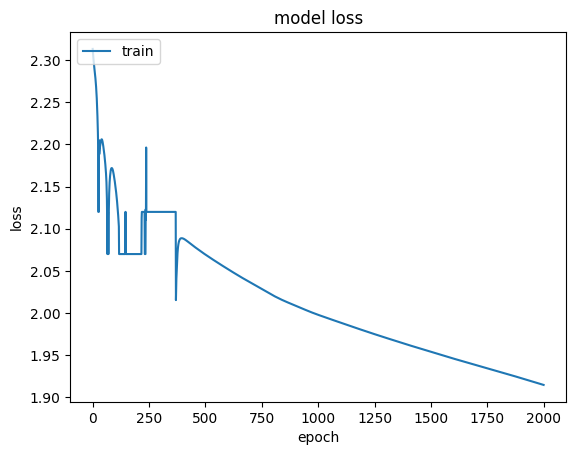

In [81]:
plt.plot(history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

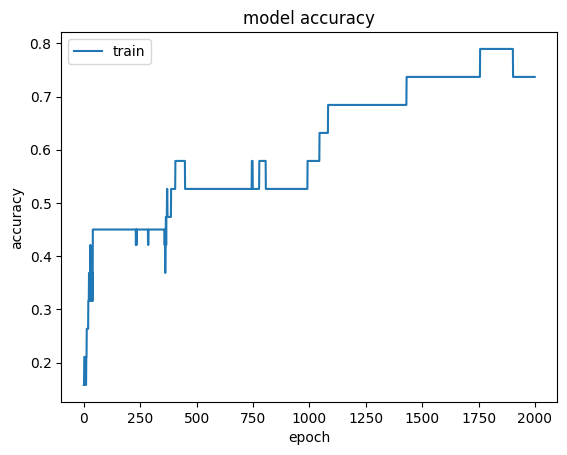

In [89]:
plt.plot(history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

In [19]:
#model.save('actions.h5')

Оценка точности

In [18]:
#model = load_model('actions.h5')

In [93]:
from sklearn.metrics import accuracy_score

In [95]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 104ms/step


In [96]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [98]:
accuracy_score(ytrue, yhat)

0.8